In [1]:
import pandas as pd

# Loading data
df = pd.read_csv('owid-covid-data.csv')

# Checking columns
print("Columns:\n", df.columns, "\n")

# Previewing rows
print("First 5 rows:\n", df.head(), "\n")

# Identifying missing values
print("Missing values per column:\n", df.isnull().sum())

Columns:
 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

In [2]:
# Filtering data for Kenya
countries = ['Kenya']
df = df[df['location'].isin(countries)]

# Drop rows with missing dates or critical values like total_cases
df = df.dropna(subset=['date', 'total_cases'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Handle missing numeric values using interpolation
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].interpolate()

# Preview cleaned data
print(df.head())

       iso_code continent location       date  total_cases  new_cases  \
136302      KEN    Africa    Kenya 2020-03-14          1.0        1.0   
136303      KEN    Africa    Kenya 2020-03-15          1.0        0.0   
136304      KEN    Africa    Kenya 2020-03-16          3.0        2.0   
136305      KEN    Africa    Kenya 2020-03-17          3.0        0.0   
136306      KEN    Africa    Kenya 2020-03-18          4.0        1.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
136302               0.143           NaN         0.0                  0.0   
136303               0.143           NaN         0.0                  0.0   
136304               0.429           NaN         0.0                  0.0   
136305               0.429           NaN         0.0                  0.0   
136306               0.571           NaN         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
136302  ...      

In [14]:
# 4. Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming we have Kenya data)
df = pd.read_csv('owid-covid-data.csv')
kenya_data = df[df['location'] == 'Kenya'].copy()
kenya_data['date'] = pd.to_datetime(kenya_data['date'])

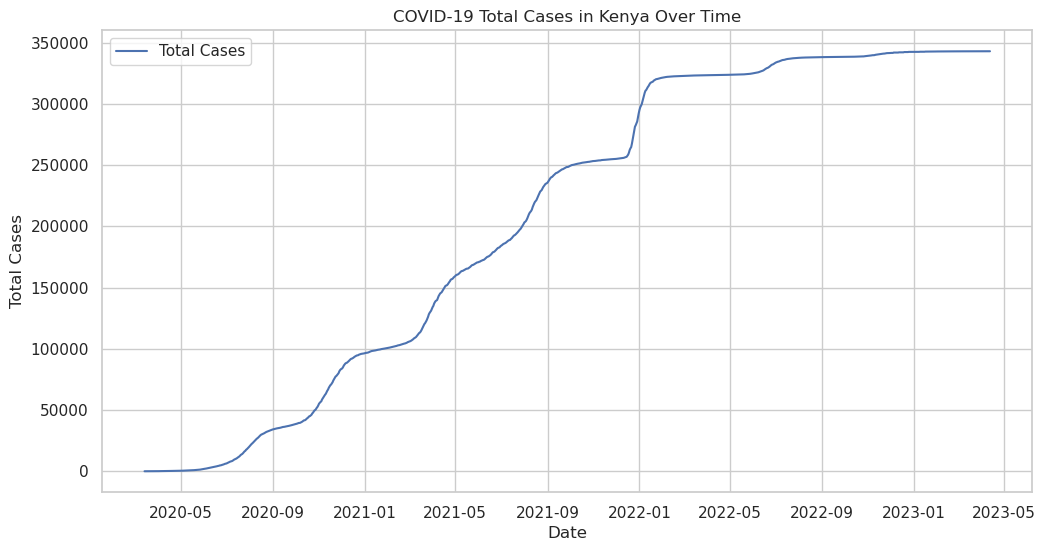

In [15]:
 # Total Cases Over Time for Kenya
plt.figure(figsize=(12, 6))
plt.plot(kenya_data['date'], kenya_data['total_cases'], label='Total Cases')
plt.title('COVID-19 Total Cases in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.legend()
plt.show()

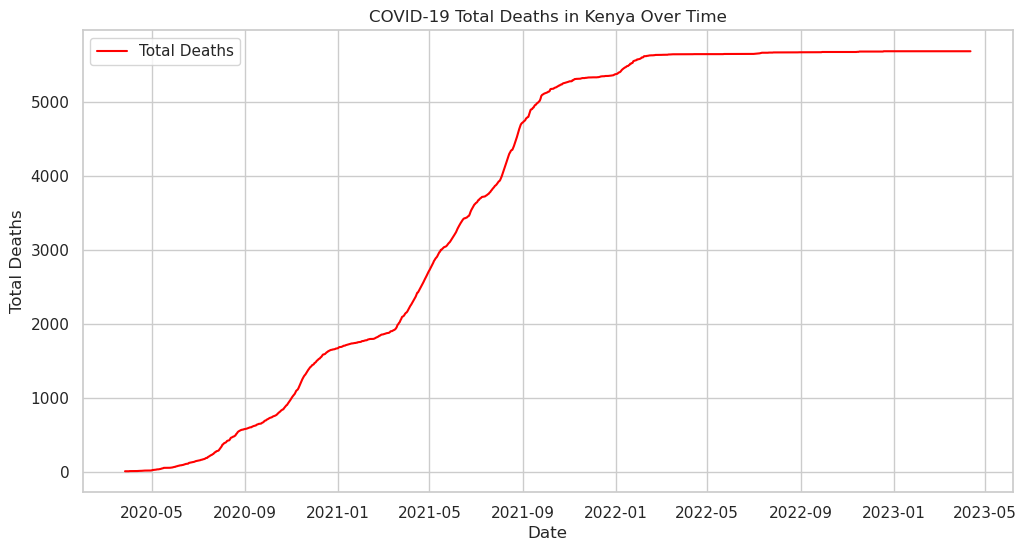

In [16]:
# Total Deaths Over Time for Kenya
plt.figure(figsize=(12, 6))
plt.plot(kenya_data['date'], kenya_data['total_deaths'], color='red', label='Total Deaths')
plt.title('COVID-19 Total Deaths in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.legend()
plt.show()

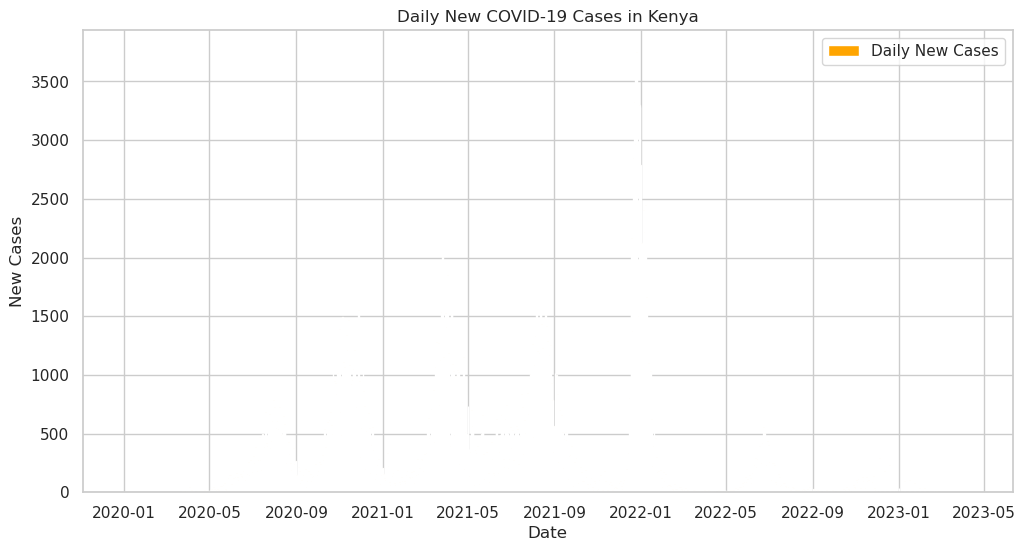

In [17]:
# Daily New Cases in Kenya
plt.figure(figsize=(12, 6))
plt.bar(kenya_data['date'], kenya_data['new_cases'], color='orange', label='Daily New Cases')
plt.title('Daily New COVID-19 Cases in Kenya')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.legend()
plt.show()

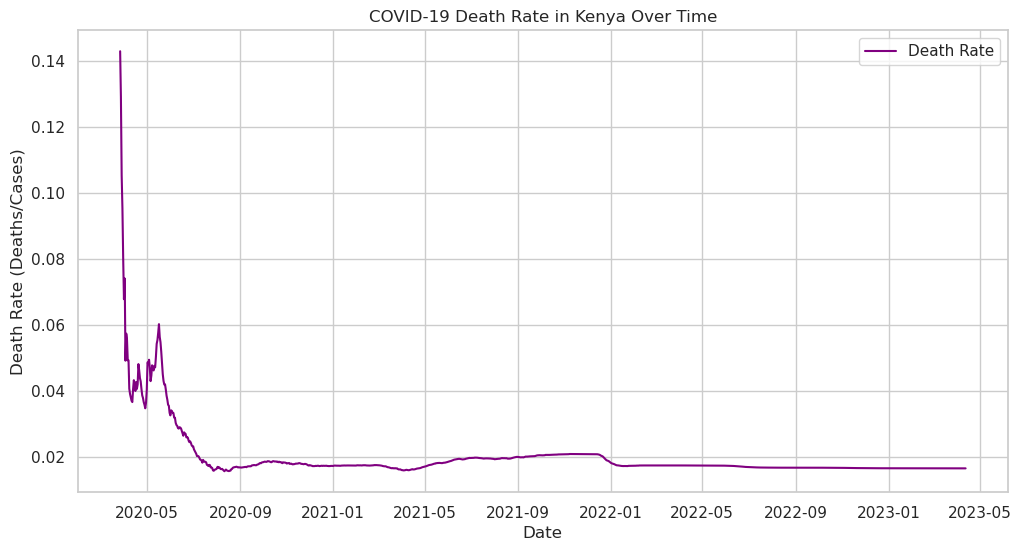

In [18]:
# Death Rate Calculation in Kenya
kenya_data['death_rate'] = kenya_data['total_deaths'] / kenya_data['total_cases']

plt.figure(figsize=(12, 6))
plt.plot(kenya_data['date'], kenya_data['death_rate'], color='purple', label='Death Rate')
plt.title('COVID-19 Death Rate in Kenya Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (Deaths/Cases)')
plt.grid(True)
plt.legend()
plt.show()

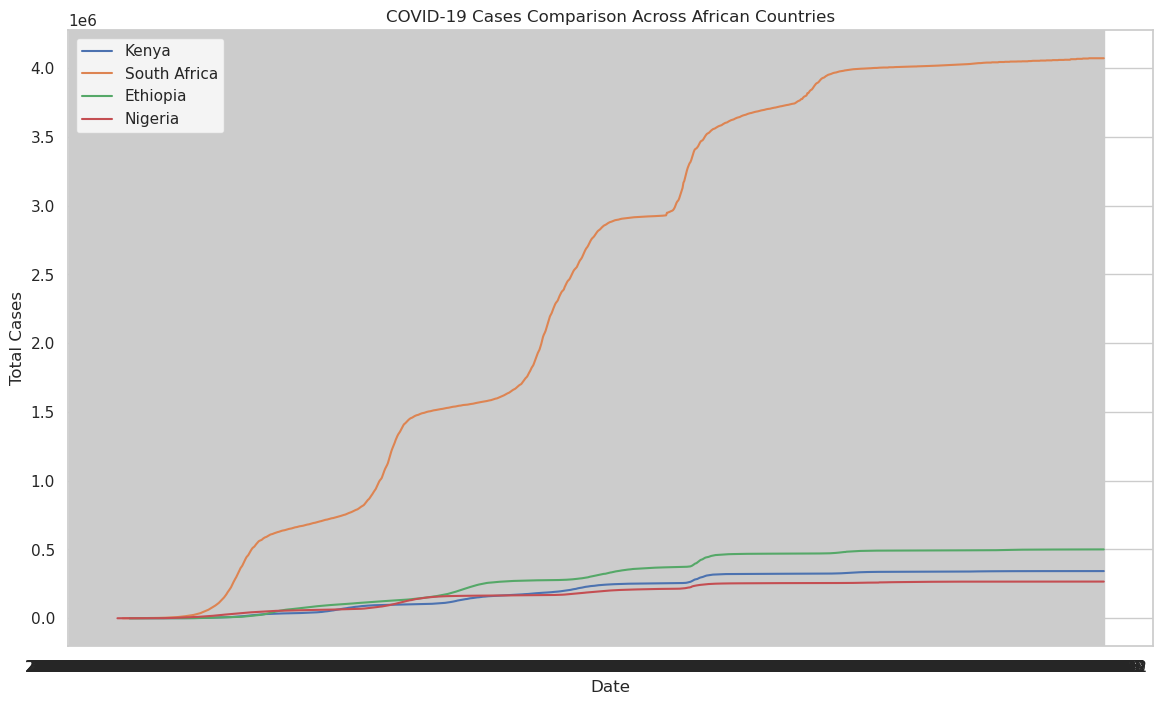

In [19]:
# Comparison with Other Countries
# Example with multiple countries
countries = ['Kenya', 'South Africa', 'Ethiopia', 'Nigeria']
multi_country = df[df['location'].isin(countries)]

plt.figure(figsize=(14, 8))
for country in countries:
    country_data = multi_country[multi_country['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
    
plt.title('COVID-19 Cases Comparison Across African Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()

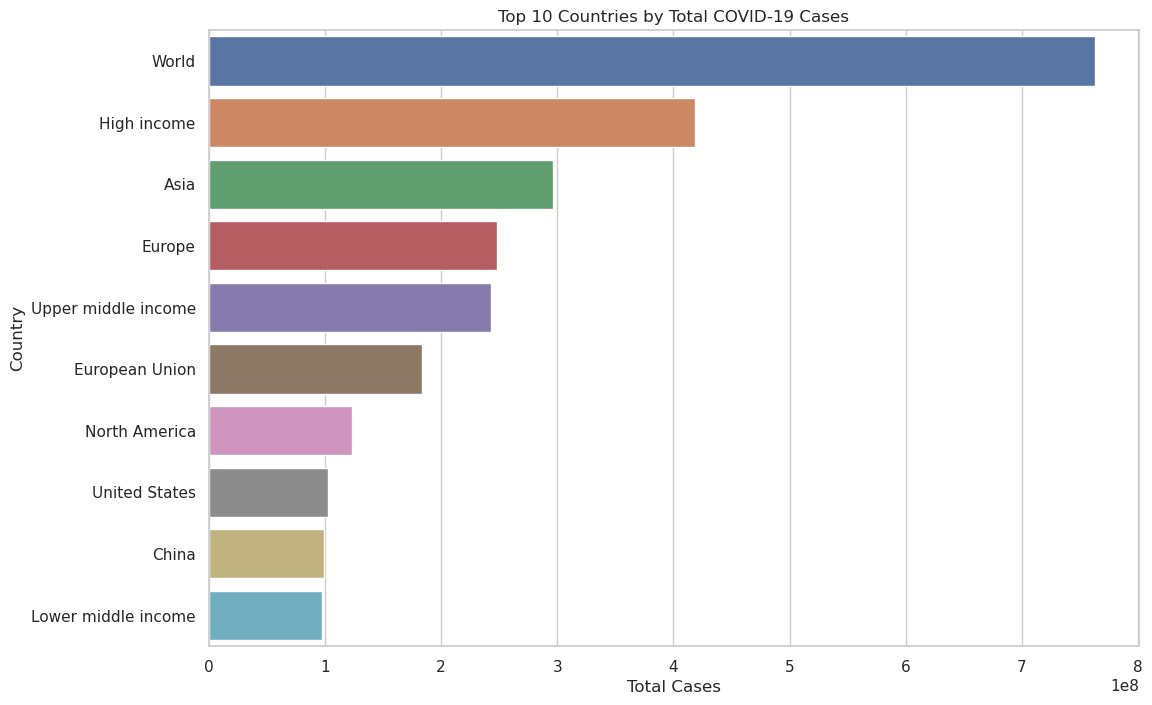

In [20]:
# Top Countries by Total Cases
latest = df[df['date'] == df['date'].max()]
top_countries = latest.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='total_cases', y='location', data=top_countries)
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

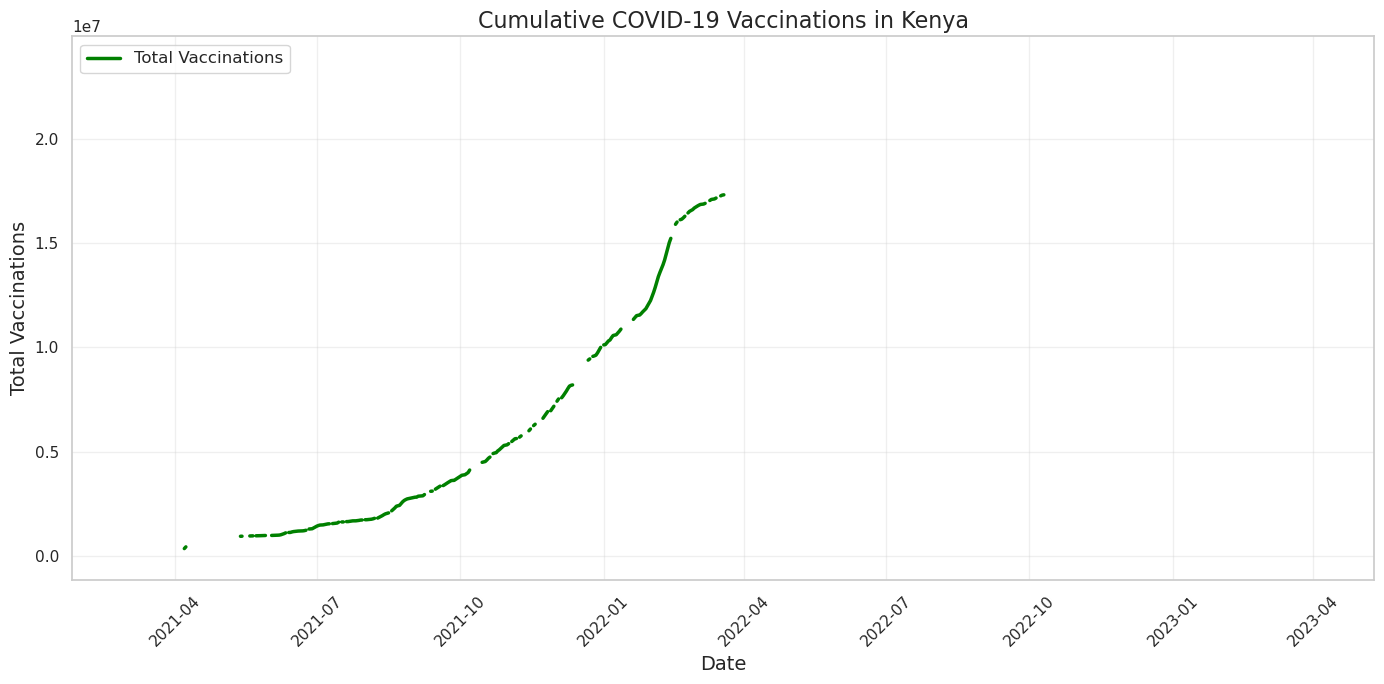

In [30]:
# 5. Visualizing Vaccination Progress

#Cumulative Vaccinations Over Time
plt.figure(figsize=(14, 7))
plt.plot(kenya_data['date'], kenya_data['total_vaccinations'], 
         label='Total Vaccinations', color='green', linewidth=2.5)
plt.title('Cumulative COVID-19 Vaccinations in Kenya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Vaccinations', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

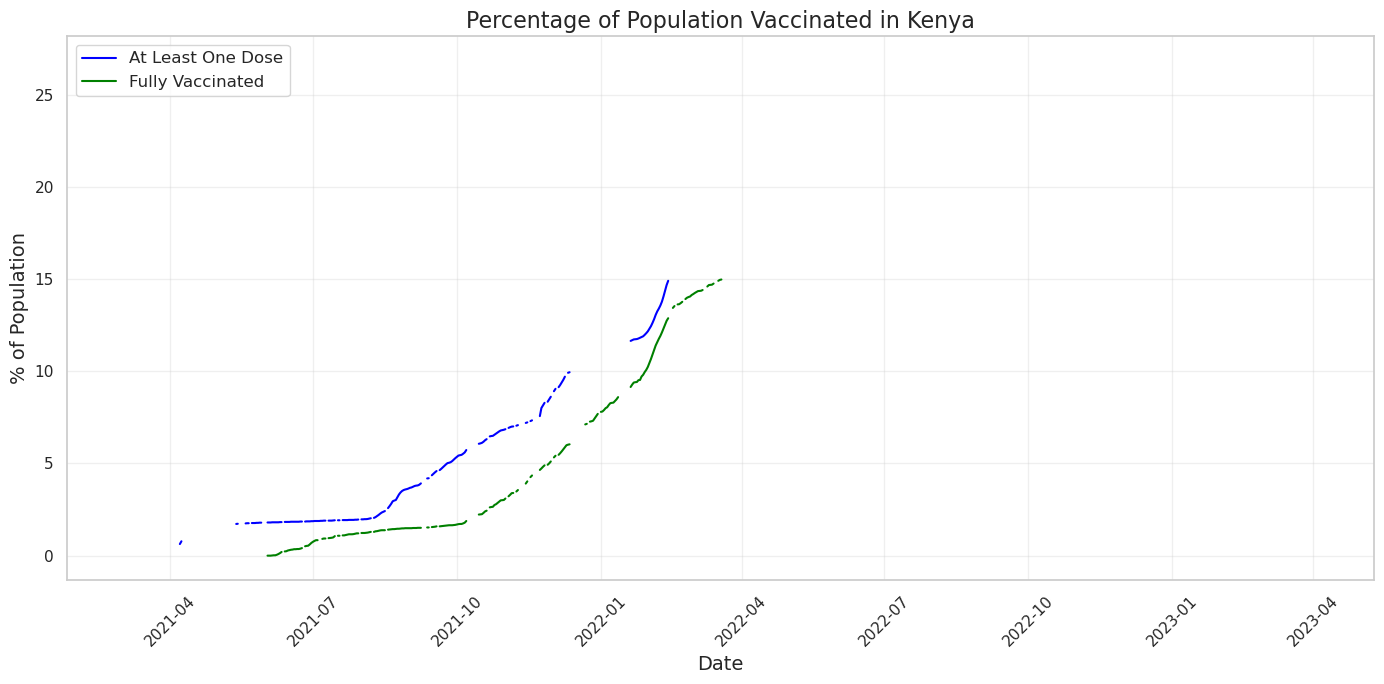

In [26]:
# Percentage of Population Vaccinated
plt.figure(figsize=(14, 7))
plt.plot(kenya_data['date'], kenya_data['people_vaccinated_per_hundred'], 
         label='At Least One Dose', color='blue')
plt.plot(kenya_data['date'], kenya_data['people_fully_vaccinated_per_hundred'], 
         label='Fully Vaccinated', color='green')
plt.title('Percentage of Population Vaccinated in Kenya', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% of Population', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

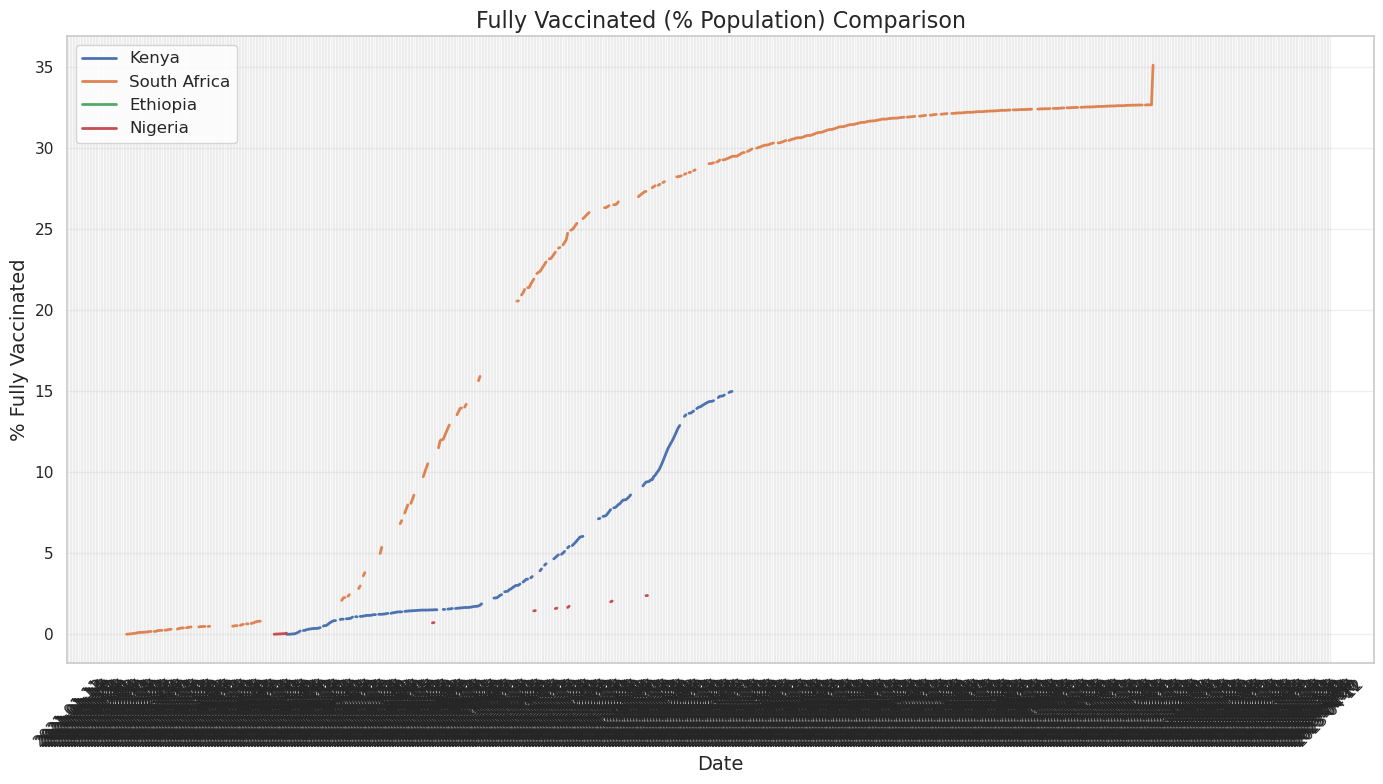

In [31]:
# Example with multiple countries
countries = ['Kenya', 'South Africa', 'Ethiopia', 'Nigeria']
multi_country = df[df['location'].isin(countries)]

plt.figure(figsize=(14, 8))
for country in countries:
    country_data = multi_country[multi_country['location'] == country]
    plt.plot(country_data['date'], 
             country_data['people_fully_vaccinated_per_hundred'], 
             label=country, linewidth=2)
    
plt.title('Fully Vaccinated (% Population) Comparison', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Fully Vaccinated', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()